# Importación de Librerias

In [188]:
# Análisis
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

---

In [189]:
!ls

BELLAVISTA		 los_olivos_dolares.pkl   magdalena_dolares.pkl
bellavista_dolares.pkl	 LOS_OLIVOS_DOLARES.xlsx  MAGDALENA_DOLARES.xlsx
BELLAVISTA_DOLARES.xlsx  los_olivos_soles.pkl	  MAGDALENA_SOLES.xlsx
bellavista_soles.pkl	 LOS_OLIVOS_SOLES.xlsx	  main
BELLAVISTA_SOLES.xlsx	 MAGDALENA		  VENTA_INMUEBLE.ipynb


In [190]:
# lectura del archivo excel
df = pd.read_excel("MAGDALENA_SOLES.xlsx")

In [191]:
filas, columnas = df.shape
print("Número de filas:", filas)
print("Número de columnas:", columnas)

Número de filas: 2313
Número de columnas: 11


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2313 entries, 0 to 2312
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Año                         2313 non-null   int64  
 1   Trimestre                   2313 non-null   int64  
 2   Precio en soles corrientes  2313 non-null   float64
 3   Distrito                    2313 non-null   object 
 4   Superficie                  2313 non-null   int64  
 5   Número de habitaciones      2313 non-null   int64  
 6   Número de baños             2313 non-null   int64  
 7   Número de garajes           2313 non-null   int64  
 8   Piso de ubicación           2110 non-null   float64
 9   Vista al exterior           2110 non-null   float64
 10  Años de antigüedad          2313 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 198.9+ KB


In [193]:
df.head()

,Año,Trimestre,Precio en soles corrientes,Distrito,Superficie,Número de habitaciones,Número de baños,Número de garajes,Piso de ubicación,Vista al exterior,Años de antigüedad
0,2021,1,549906.425562,Magdalena,85,3,2,1,NaN,NaN,9
1,2021,1,708447.073623,Magdalena,94,3,2,1,NaN,NaN,0
2,2021,1,786756.822464,Magdalena,111,3,2,2,NaN,NaN,3
3,2021,1,428142.084783,Magdalena,78,3,2,1,NaN,NaN,8
4,2021,1,340318.067391,Magdalena,53,1,1,1,NaN,NaN,1


## Eliminar columnas

**Columna Distrito**
- En los datos, todos los registros tienen el valor "Bellavista" → no aporta variabilidad al modelo.
- Si todos los valores son iguales, esta variable no ayuda a explicar el precio

**Vista al exterior**
- Según los datos, solo contiene "1" o vacío.
- Si casi todos son "1" → es prácticamente constante, no aporta valor.

In [194]:
df.drop(["Distrito", "Vista al exterior"], axis=1, inplace=True)

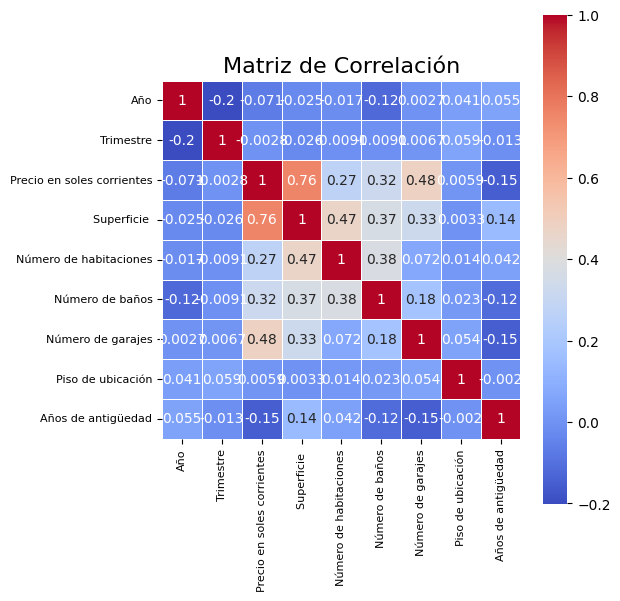

In [195]:
# Calcular la correlación
corr = df.corr()

plt.figure(figsize=(len(corr.columns) * 0.7, len(corr.columns) * 0.7))  # ajustar tamaño dinámico
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    cbar=True,
    square=True,        # celdas cuadradas
    linewidths=0.5
)

plt.title("Matriz de Correlación", fontsize=16)
plt.xticks(rotation=90, fontsize=8)   # gira labels eje X
plt.yticks(rotation=0, fontsize=8)    # labels eje Y
plt.tight_layout()
plt.show()

### Matriz de correlación

* Va de **-1 a 1**:

  * **1** → correlación positiva perfecta (si una sube, la otra también).
  * **-1** → correlación negativa perfecta (si una sube, la otra baja).
  * **0** → no hay relación lineal.

* Color:

  * **Rojo** → correlación positiva fuerte.
  * **Azul** → correlación negativa.
  * **Cercano a blanco** → casi sin relación.

---

### Interpretación de la matriz

1. **Variable objetivo: "Precio en soles corrientes"**

   * `Superficie` → **0.79** → **alta correlación positiva**.
     📌 Significa que a mayor superficie, mayor precio → es la variable más importante.
   * `Número de habitaciones` → **0.53** → correlación positiva moderada.
     📌 Más habitaciones suelen implicar mayor precio.
   * `Número de baños` → **0.37** → correlación positiva moderada-baja.
   * `Años de antigüedad` → **0.20** → correlación baja, pero positiva.
   * `Trimestre`, `Piso de ubicación`, `Número de garajes`, `Año` → correlación muy baja, casi nula.
     📌 No parecen aportar mucha información para explicar el precio.

---

2. **Relaciones entre variables predictoras**

   * `Superficie` y `Número de habitaciones` → **0.61** → fuerte relación (tiene sentido: más grande la vivienda, más habitaciones).
   * `Número de habitaciones` y `Número de baños` → **0.41** → moderada, suelen crecer juntas.
   * `Número de baños` y `Años de antigüedad` → **-0.31** → ligera correlación negativa, viviendas más nuevas tienden a tener más baños.

---

3. **Variables poco útiles**

   * `Trimestre`, `Piso de ubicación` y `Número de garajes` → correlaciones muy cercanas a 0 con el precio → probablemente no agreguen mucho valor en un modelo lineal.
   * Pero ojo: que no haya correlación lineal **no significa que no tengan algún efecto no lineal** (podrían ser útiles en modelos no lineales).

---

### Conclusión

* Las variables más relevantes para predecir el precio son:
  **Superficie > Habitaciones > Baños > Antigüedad**.
* Se puede considerar eliminar o dar menos peso a:
  **Trimestre, Año, Piso de ubicación, Número de garajes** (al menos en un modelo lineal).


In [196]:
df.head()

,Año,Trimestre,Precio en soles corrientes,Superficie,Número de habitaciones,Número de baños,Número de garajes,Piso de ubicación,Años de antigüedad
0,2021,1,549906.425562,85,3,2,1,NaN,9
1,2021,1,708447.073623,94,3,2,1,NaN,0
2,2021,1,786756.822464,111,3,2,2,NaN,3
3,2021,1,428142.084783,78,3,2,1,NaN,8
4,2021,1,340318.067391,53,1,1,1,NaN,1


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2313 entries, 0 to 2312
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Año                         2313 non-null   int64  
 1   Trimestre                   2313 non-null   int64  
 2   Precio en soles corrientes  2313 non-null   float64
 3   Superficie                  2313 non-null   int64  
 4   Número de habitaciones      2313 non-null   int64  
 5   Número de baños             2313 non-null   int64  
 6   Número de garajes           2313 non-null   int64  
 7   Piso de ubicación           2110 non-null   float64
 8   Años de antigüedad          2313 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 162.8 KB


In [198]:
# Contar valores vacíos por columna
df.isnull().sum()

Año                             0
Trimestre                       0
Precio en soles corrientes      0
Superficie                      0
Número de habitaciones          0
Número de baños                 0
Número de garajes               0
Piso de ubicación             203
Años de antigüedad              0
dtype: int64

In [199]:
# 3. Rellenar NaN con la media de cada columna
df = df.fillna(df.mean(numeric_only=True))

In [200]:
# df = pd.get_dummies(df, columns=["Distrito"], drop_first=True)

## Entrenamiento

In [201]:
# X = df.drop(columns=["Precio en dólares corrientes"])
# y = df["Precio en dólares corrientes"]
X = df.drop(columns=["Precio en soles corrientes"])
y = df["Precio en soles corrientes"]

In [202]:
from sklearn.model_selection import train_test_split

# Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [203]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()
# Ajustar (entrenar) el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [204]:
# Predecir sobre el set de prueba
y_pred = model.predict(X_test)

In [205]:
y_pred

array([ 361857.01621453,  887798.31247671,  465275.76998288,
        500005.91007622,  481210.04851553,  581880.55538259,
        388654.31456636,  498456.93638851,  523696.83079128,
        551122.14013025,  390902.05135858,  375813.90765273,
        595778.63989068,  642874.67902544,  522236.11039063,
        526709.76738208,  645996.05315043,  297228.85587133,
        482307.25859783,  738132.70570301,  396938.11338875,
        660811.11598708,  359849.33784928,  579531.13395229,
        897251.01729227,  691623.94077517,  757252.64247711,
        556460.97909161,  502061.17338236,  858657.75085692,
        549086.60949409,  608407.7379256 ,  691341.86363913,
        413319.81927153,  473448.31075252,  959382.66725973,
        505313.57815646,  334606.17886638,  400646.63923625,
        567923.23444493,  632300.08564369,  515729.52697859,
        551333.68289791,  763165.91600431,  482856.17944699,
        549585.0562916 ,  507789.10503338,  704333.808604  ,
        808074.54766426,

In [206]:
import pandas as pd

# Crear un DataFrame comparando valores reales vs predichos
resultados = pd.DataFrame({
    "Real": y_test.values,
    "Predicho": y_pred,
    "Diferencia": y_test.values - y_pred
})

print(resultados)  # mostrar las primeras filas


             Real      Predicho     Diferencia
0    5.427238e+05  3.618570e+05  180866.767677
1    9.515833e+05  8.877983e+05   63785.020857
2    4.434416e+05  4.652758e+05  -21834.158078
3    5.119408e+05  5.000059e+05   11934.924634
4    5.450874e+05  4.812100e+05   63877.355411
5    5.217553e+05  5.818806e+05  -60125.222049
6    4.881299e+05  3.886543e+05   99475.631185
7    4.396836e+05  4.984569e+05  -58773.304246
8    4.957628e+05  5.236968e+05  -27934.062370
9    5.523814e+05  5.511221e+05    1259.258794
10   3.195340e+05  3.909021e+05  -71368.055953
11   3.560444e+05  3.758139e+05  -19769.487653
12   6.600713e+05  5.957786e+05   64292.625874
13   6.188196e+05  6.428747e+05  -24055.073831
14   5.033837e+05  5.222361e+05  -18852.443724
15   5.709500e+05  5.267098e+05   44240.232618
16   7.396653e+05  6.459961e+05   93669.239194
17   4.813041e+05  2.972289e+05  184075.281502
18   5.508330e+05  4.823073e+05   68525.720053
19   7.612667e+05  7.381327e+05   23133.960964
20   3.943567

## Evaluar el modelo

In [207]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

# Raíz del error cuadrático medio
rmse = np.sqrt(mse)

# R² (qué tan bien explica la varianza de y)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)


MSE: 9361853647.092796
RMSE: 96756.67236471496
R²: 0.7159284423377104


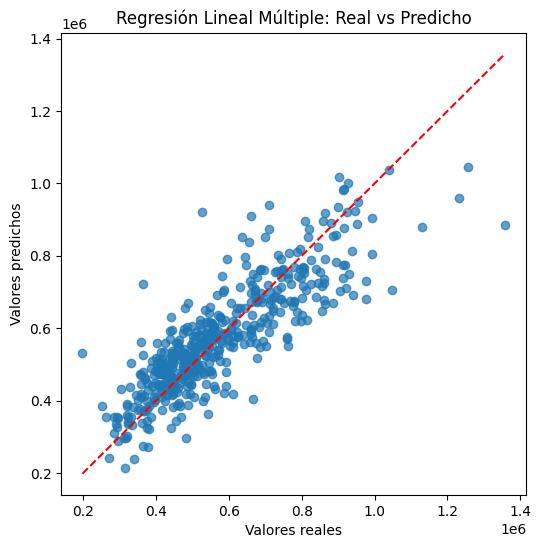

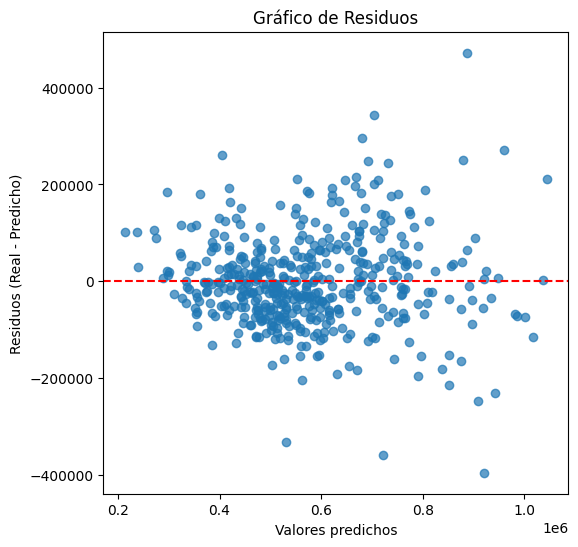

In [208]:
import matplotlib.pyplot as plt

# --- 1. Gráfico Real vs Predicho ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Regresión Lineal Múltiple: Real vs Predicho")
plt.show()

# --- 2. Gráfico de Residuos ---
residuos = y_test - y_pred

plt.figure(figsize=(6,6))
plt.scatter(y_pred, residuos, alpha=0.7)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Valores predichos")
plt.ylabel("Residuos (Real - Predicho)")
plt.title("Gráfico de Residuos")
plt.show()


### **1. Gráfico Real vs Predicho (arriba)**

* **Qué muestra**: En el eje X están los valores reales (`y_test`), y en el eje Y los valores predichos (`y_pred`).
* **La línea roja discontinua**: Representa la **línea ideal** donde las predicciones coinciden exactamente con los valores reales (`y = x`).
* **Interpretación**:

  * Mientras más cerca estén los puntos de esa línea, mejor el modelo.
  * Si los puntos se dispersan mucho, significa que el modelo tiene errores de predicción en esos casos.
  * En el gráfico se ve una tendencia clara siguiendo la línea → el modelo **sí captura la relación** entre las variables, aunque hay cierta dispersión (errores).

---

### **2. Gráfico de Residuos (abajo)**

* **Qué muestra**: En el eje X están los valores predichos, y en el eje Y los residuos (`valor real - valor predicho`).
* **La línea roja horizontal**: Representa el **cero** → el punto donde el valor predicho es igual al valor real.
* **Interpretación**:

  * Los residuos deberían estar distribuidos de manera aleatoria alrededor de 0.
  * Si ves un patrón (por ejemplo, forma de curva, abanico, o tendencia), significa que el modelo no está captando toda la estructura de los datos.
  * En tu caso, los residuos parecen estar dispersos sin un patrón evidente → lo cual es **buena señal**, indica que la regresión lineal es razonable para tus datos.
  * Sin embargo, hay valores con residuos grandes (positivos y negativos), lo que muestra que **en algunos casos el modelo se equivoca bastante**.

---

✅ **Conclusión general de tus gráficos**:

* Tu modelo de regresión lineal múltiple está capturando la relación (los puntos siguen una tendencia lineal).
* Los residuos no muestran un patrón sistemático → no parece haber una fuerte violación de los supuestos de linealidad.
* Sí hay errores grandes en ciertos casos → quizás podrías mejorar el modelo agregando más variables explicativas, transformaciones o probando modelos más complejos.

---

¿Quieres que te explique también **qué supuestos de la regresión lineal** se pueden verificar con estos gráficos? (por ejemplo: homocedasticidad, linealidad, independencia, normalidad de errores).


In [209]:
# cuánto influye cada variable en el precio
coeficientes = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": model.coef_
})
print(coeficientes.sort_values(by="Coeficiente", ascending=False))

                 Variable   Coeficiente
5       Número de garajes  61891.518396
2             Superficie    7093.857619
4         Número de baños   2195.390568
1               Trimestre   1577.468736
6       Piso de ubicación  -1801.937013
7      Años de antigüedad  -4200.273579
0                     Año  -5015.215386
3  Número de habitaciones -28980.892827


In [210]:
import joblib

# Guardar el modelo entrenado en un archivo .pkl
joblib.dump(model, "magdalena_soles.pkl")

['magdalena_soles.pkl']

In [211]:
!ls

BELLAVISTA		 LOS_OLIVOS_DOLARES.xlsx  magdalena_soles.pkl
bellavista_dolares.pkl	 los_olivos_soles.pkl	  MAGDALENA_SOLES.xlsx
BELLAVISTA_DOLARES.xlsx  LOS_OLIVOS_SOLES.xlsx	  main
bellavista_soles.pkl	 MAGDALENA		  VENTA_INMUEBLE.ipynb
BELLAVISTA_SOLES.xlsx	 magdalena_dolares.pkl
los_olivos_dolares.pkl	 MAGDALENA_DOLARES.xlsx


---

---

In [87]:
# Cargar el modelo desde el archivo .pkl
modelo_cargado = joblib.load("los_olivos_soles.pkl")

# Ahora puedes usarlo directamente
y_pred = modelo_cargado.predict(X_test)

In [88]:
y_pred

array([ 94407.56030719,  78209.59791985, 109150.94383749,  53295.70525574,
        91487.29163613,  83806.46488396,  73197.92073359,  72967.25957506,
        74827.32825725,  56894.52494573, 102917.99762513, 133864.1547109 ,
        64181.6371802 ,  62063.56880024,  70748.52425268,  61244.13444801,
        73314.34889962, 109995.12702325, 130157.76894044,  89242.53596547,
       114159.10731005,  74399.80181335,  67559.88733001,  64795.52957535,
        75986.06222648,  76002.0566854 ,  73296.60713492,  64735.28212709,
       116695.34696321, 124459.08180743,  87322.47790432, 132861.94675636,
       127482.02089148,  65376.76913045,  87623.54170567, 106117.62753279,
        76756.32471028, 121950.69262299, 119756.05877351, 123432.76625405,
        60087.96423974, 135163.0066688 , 143759.66478539,  75611.82038028,
        84820.32992   ,  85376.13075844,  85165.29755401, 127504.64762237,
        90222.17590186,  84708.70590582,  83952.99092589,  83032.2503969 ,
       109330.75321936, 1

In [89]:
X_test

,Año,Trimestre,Superficie,Número de habitaciones,Número de baños,Número de garajes,Piso de ubicación,Años de antigüedad
423,2022,3,97,3,1,0,0.000,16
548,2023,2,75,3,2,0,0.000,8
731,2024,1,107,3,2,0,0.000,10
588,2023,2,50,2,1,0,0.000,7
1052,2025,1,89,3,2,0,0.000,10
616,2023,3,80,3,2,0,0.000,0
991,2024,4,74,2,1,0,0.000,12
993,2024,4,75,3,1,0,5.000,0
1072,2025,1,80,3,1,0,0.000,35
923,2024,3,57,2,1,0,0.000,16


---

In [ ]:
df_nuevo = pd.read_excel("b1.xlsx")
df_nuevo.drop(["Distrito", "Vista al exterior"], axis=1, inplace=True)
df_nuevo = df_nuevo.fillna(df_nuevo.mean(numeric_only=True))

In [159]:
# Separar X (las features) -> NO debe incluir "Precio en soles corrientes"
X_new = df_nuevo.drop(columns=["Precio en soles corrientes"], errors="ignore")

y_pred = modelo_cargado.predict(X_new)

In [160]:
y_pred

array([488182.11939131])